Name: Jason Corbaley
Class: DSC 550
Assignment: 7.3
Due: January 26th, 2020


In [2]:
import pandas as pd 
import yellowbrick 

#Step 1:  Load data into a dataframe 

addr1 = "netflix_titles_nov_2019.csv" 
data = pd.read_csv(addr1)

In [3]:
# Step 2:  check the dimension of the table 

print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (5837, 12)


In [4]:
#Step 3:  Look at the data 
 
# new data frame with split value columns 
new = data["date_added"].str.split(" ", n = 1, expand = True) 
  
# making separate first name column from new data frame 
data['Month_Added']= new[0] 
  
# making separate last name column from new data frame 
data["Day_Year_Added"]= new[1] 
  
# Dropping old Name columns 
data.drop(columns =["date_added"], inplace = True) 
  
# df display 

print(data.head(5)) 

    show_id                                title                    director  \
0  81193313                            Chocolate                         NaN   
1  81197050  Guatemala: Heart of the Mayan World  Luis Ara, Ignacio Jaunsolo   
2  81213894                      The Zoya Factor             Abhishek Sharma   
3  81082007                            Atlantics                   Mati Diop   
4  80213643                      Chip and Potato                         NaN   

                                                cast  \
0  Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...   
1                                  Christian Morales   
2  Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...   
3  Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...   
4  Abigail Oliver, Andrea Libman, Briana Buckmast...   

                    country  release_year rating   duration  \
0               South Korea          2019  TV-14   1 Season   
1                       NaN          2019   TV-G     67 

In [5]:
#Step 4:  what type of variables are in the table  

print("Describe Data") 
print(data.describe()) 
print("Summarized Data") 
print(data.describe(include=['O'])) 

Describe Data
            show_id  release_year
count  5.837000e+03   5837.000000
mean   7.730079e+07   2013.688539
std    9.479777e+06      8.419088
min    2.698800e+05   1925.000000
25%    8.004520e+07   2013.000000
50%    8.016353e+07   2016.000000
75%    8.024188e+07   2018.000000
max    8.122720e+07   2020.000000
Summarized Data
         title                director                cast        country  \
count     5837                    3936                5281           5410   
unique    5780                    3108                5087            527   
top     Tunnel  Raúl Campos, Jan Suter  David Attenborough  United States   
freq         3                      18                  18           1907   

       rating  duration      listed_in  \
count    5827      5837           5837   
unique     14       194            449   
top     TV-MA  1 Season  Documentaries   
freq     1937      1259            297   

                                              description   type Mo

Text(0, 0.5, 'Count')

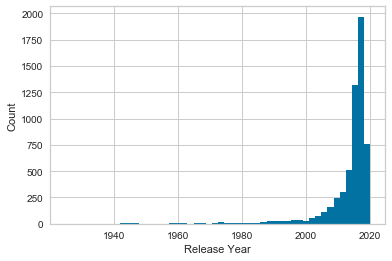

In [6]:
#Step 5: import visulization packages 

import matplotlib.pyplot as plt 

# plot the data
data['release_year'].plot.hist(bins = 50)
plt.xlabel('Release Year')
plt.ylabel('Count')

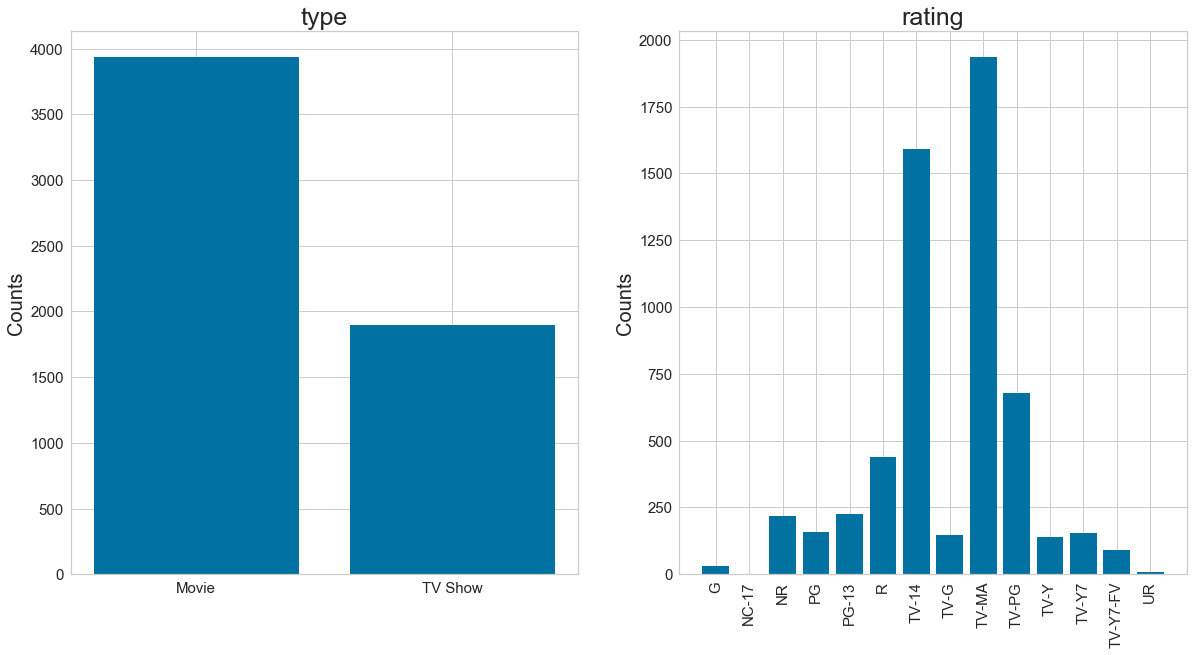

In [7]:
#6:  Barcharts: set up the figure size 

#%matplotlib inline 

plt.rcParams['figure.figsize'] = (20, 10) 

# make subplots 

fig, axes = plt.subplots(ncols = 2) 

# make the data read to feed into the visulizer 

X_type = data.groupby('type').size().reset_index(name='Counts')['type'] 
Y_type = data.groupby('type').size().reset_index(name='Counts')['Counts'] 

# make the bar plot 

axes[0].bar(X_type, Y_type) 
axes[0].set_title('type', fontsize=25) 
axes[0].set_ylabel('Counts', fontsize=20) 
axes[0].tick_params(axis='both', labelsize=15) 

# make the data read to feed into the visulizer 

X_rating = data.groupby('rating').size().reset_index(name='Counts')['rating'] 
Y_rating = data.groupby('rating').size().reset_index(name='Counts')['Counts'] 

# make the bar plot 

axes[1].bar(X_rating, Y_rating) 
axes[1].set_title('rating', fontsize=25) 
axes[1].set_ylabel('Counts', fontsize=20) 
axes[1].tick_params(axis='both', labelsize=15)
axes[1].tick_params(axis = 'x', rotation =90)

#plt.show() 

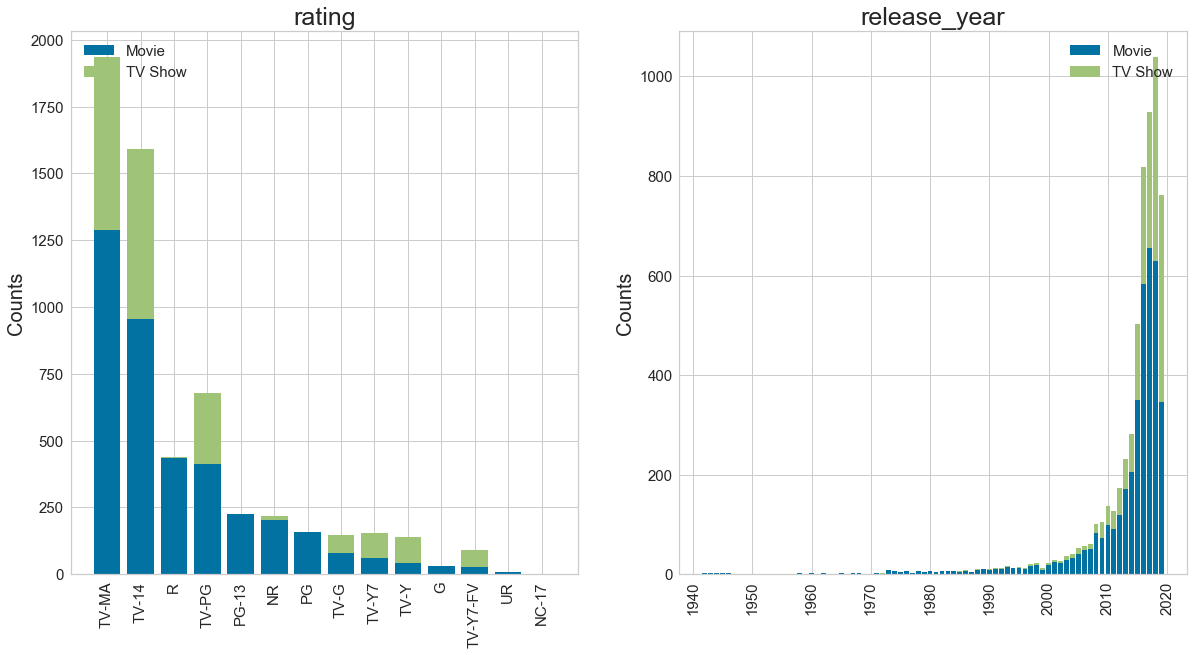

In [8]:
# Step 7 - stacked bar charts to compare movie/tv show
#set up the figure size 
#%matplotlib inline 

plt.rcParams['figure.figsize'] = (20, 10) 

# make subplots 

fig, axes = plt.subplots(ncols = 2) 


# make the data read to feed into the visulizer 

movie_release = data[data['type']=='Movie']['release_year'].value_counts() 
tvshow_release = data[data['type']=='TV Show']['release_year'].value_counts() 
tvshow_release = tvshow_release.reindex(index = movie_release.index) 

# make the bar plot 

p1 = axes[1].bar(movie_release.index, movie_release.values) 
p2 = axes[1].bar(tvshow_release.index, tvshow_release.values, bottom=movie_release.values) 

axes[1].set_title('release_year', fontsize=25) 
axes[1].set_ylabel('Counts', fontsize=20) 
axes[1].tick_params(axis='both', labelsize=15) 
axes[1].legend((p1[0], p2[0]), ('Movie', 'TV Show'), fontsize = 15) 
axes[1].tick_params(axis='x', rotation = 90)

# make the data read to feed into the visulizer 

movie_rating = data[data['type']=='Movie']['rating'].value_counts() 
tvshow_rating = data[data['type']=='TV Show']['rating'].value_counts() 
tvshow_rating = tvshow_rating.reindex(index = movie_rating.index) 

# make the bar plot 

p1 = axes[0].bar(movie_rating.index, movie_rating.values) 
p2 = axes[0].bar(tvshow_rating.index, tvshow_rating.values, bottom=movie_rating.values) 

axes[0].set_title('rating', fontsize=25) 
axes[0].set_ylabel('Counts', fontsize=20) 
axes[0].tick_params(axis='both', labelsize=15) 
axes[0].legend((p1[0], p2[0]), ('Movie', 'TV Show'), fontsize = 15) 
axes[0].tick_params(axis='x', rotation = 90)


 
#plt.show() 

In [9]:
# Step 11 - fill in missing values and eliminate features
#fill the missing age data with median value
#def fill_na_median(data, inplace=True):
    #return data.fillna(data.median(), inplace=inplace)

#fill_na_median(data['type'])

# check the result
#print(data['rating'].describe())

# fill with the most represented value
def fill_na_most(data, inplace=True):
    return data.fillna('Movie', inplace=inplace)

fill_na_most(data['type'])

# check the result
print(data['type'].describe())

# import package
import numpy as np

# log-transformation
def log_transformation(data):
    return data.apply(np.log1p)

data['release_year_log'] = log_transformation(data['release_year'])

# check the data
#print(data.describe())

count      5837
unique        2
top       Movie
freq       3939
Name: type, dtype: object


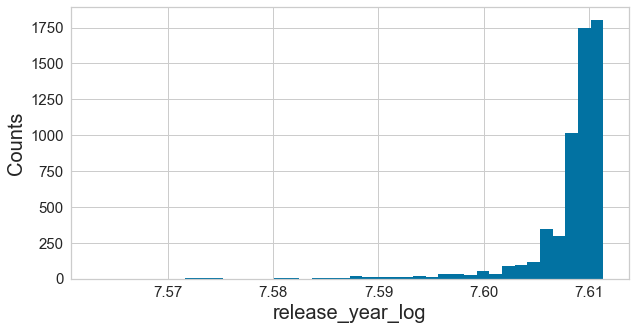

In [10]:
#Step 12 - adjust skewed data (release_yearr)
#check the distribution using histogram
# set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(data['release_year_log'], bins=40)
plt.xlabel('release_year_log', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
#plt.show()

In [11]:
#Step 13 - convert categorical data to numbers
#get the categorical data
cat_features = ['type', "rating"]
data_cat = data[cat_features]
# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)
# check the data
print(data_cat_dummies.head(10))

   type_Movie  type_TV Show  rating_G  rating_NC-17  rating_NR  rating_PG  \
0           0             1         0             0          0          0   
1           1             0         0             0          0          0   
2           1             0         0             0          0          0   
3           1             0         0             0          0          0   
4           0             1         0             0          0          0   
5           1             0         0             0          0          0   
6           1             0         0             0          0          0   
7           1             0         0             0          0          0   
8           0             1         0             0          0          0   
9           1             0         0             0          0          0   

   rating_PG-13  rating_R  rating_TV-14  rating_TV-G  rating_TV-MA  \
0             0         0             1            0             0   
1           

In [38]:
#Step 14 - create a whole features dataset that can be used for train and validation data splitting
# Here I created a new column to convert the type column to where if it is a movie a 1 will appear and a 0
# will appear if it is a TV Show. Also, we will combine the numerical features and the dummie features together
data['type_binary'] = [1 if x == 'Movie' else 0 for x in data['type']]
features_model = ['type_binary', 'release_year_log']
data_model_X = pd.concat([data[features_model], data_cat_dummies], axis=1)

# create a whole target dataset that can be used for train and validation data splitting
data_model_y = data.replace({'type': {0:'TV Show', 1:'Movie'}})['type']
# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Number of Movies and TV Shows
print('\n')
print('No. of types in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of types in the validation set:')
print(y_val.value_counts())

No. of samples in training set:  4085
No. of samples in validation set: 1752


No. of types in the training set:
Movie      2772
TV Show    1313
Name: type, dtype: int64


No. of types in the validation set:
Movie      1167
TV Show     585
Name: type, dtype: int64


/Users/jasoncorbaley/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


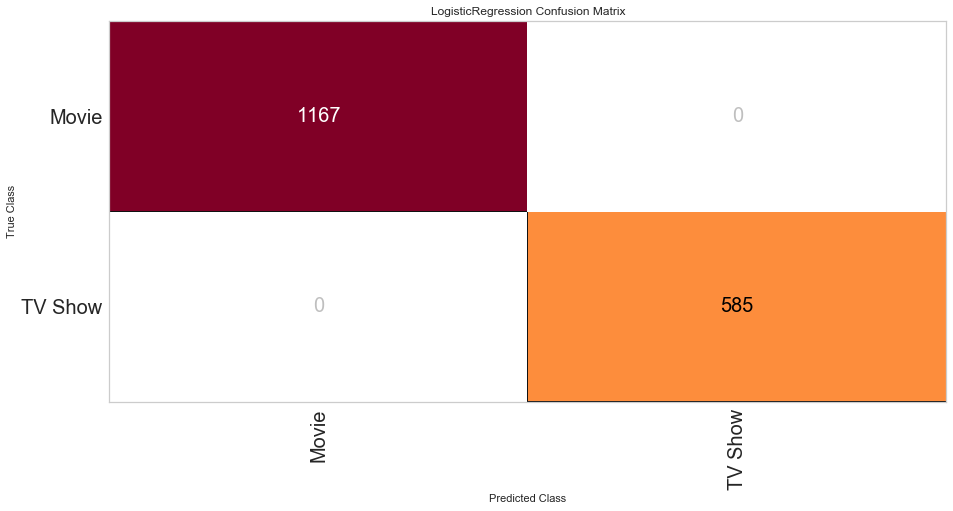

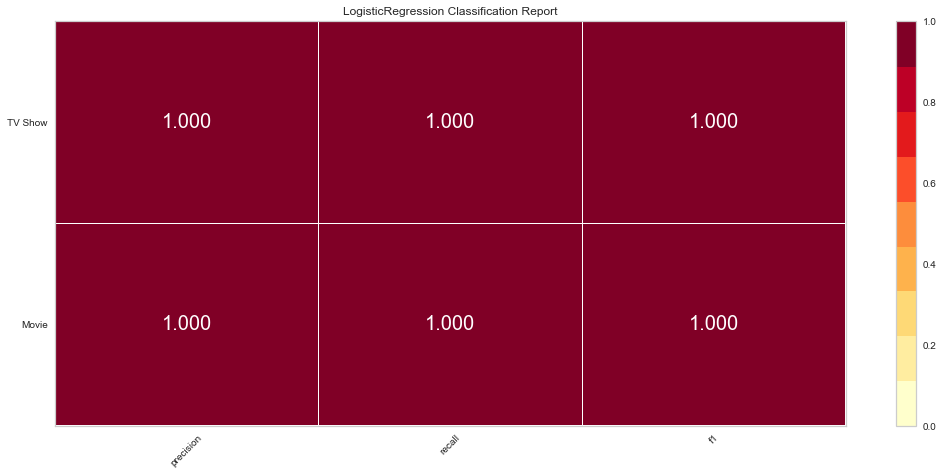

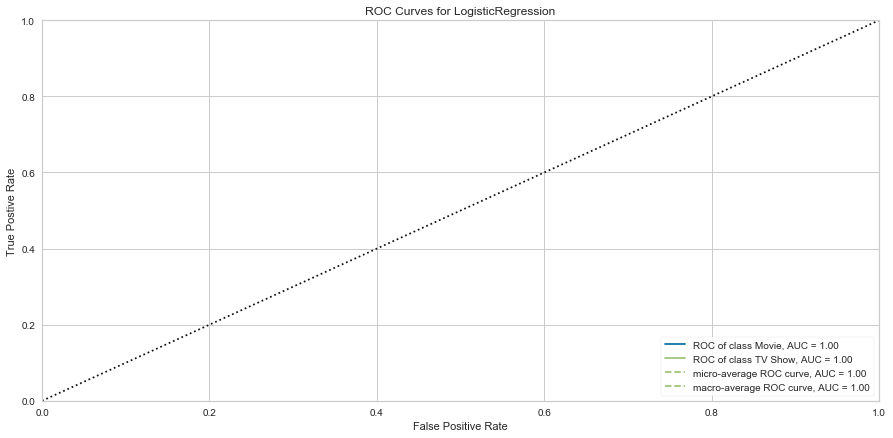

In [39]:
# Step 15 - Eval Metrics
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model 
model = LogisticRegression()

#The ConfusionMatrix visualizer taxes a model
classes = ['Movie', 'TV Show']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()